In [1]:
from neurospyke.plot_df_utils import D1_D3_scatter_subplots
from neurospyke.query import Query
from neurospyke.utils import concat_dfs_by_index 
from neurospyke.utils import load_cells
from neurospyke.utils import reorder_df 
from neurospyke.utils import plot_classifier_comparison
import numpy as np
%matplotlib inline

Setting defaults for numpy
Setting defaults for matplotlib
Settings defaults for pandas


In [2]:
""" Load example cells and run queries """
cell_file_pattern = 'docs/example_cells/*.mat'
example_cells = load_cells(cell_file_pattern)

In [3]:
# Query 1: Hyperpolarization properties (sag/rebound)
response_criteria = {'curr_duration': .12, 'curr_amplitude': -400}
calculated_cell_properties = ['reb_delta_t', 'sag_fit_amplitude'] 
sag_reb_query = Query.create_or_load_from_cache(
        example_cells, 
        response_criteria=response_criteria, 
        cell_properties=calculated_cell_properties,
        )
sag_df = sag_reb_query.mean_df


Loading query from cache


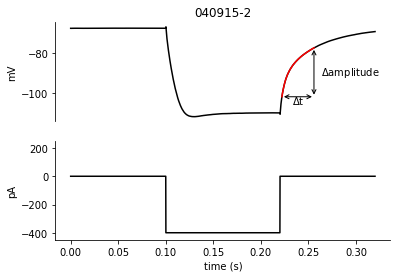

In [4]:
# Plot example reb_delta_t sweep and sag_fit_amplitude sweep
sag_reb_query.cells[0].plot_reb_delta_t()


Loading query from cache


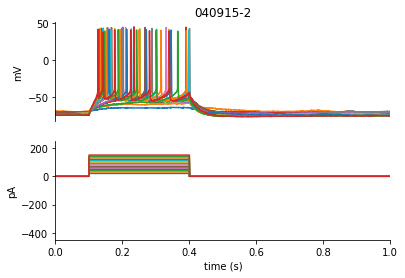

In [5]:
# Query 2: AP properties (spiking)
response_criteria = {'sweep_time': '<150', 'curr_duration': .3, 'curr_amplitude': '>0'}
response_property_spike_categories = [
    'log_doublet_index_by_num_spikes', 
    'delta_thresh_last_spike', 
    'dVdt_pct_APamp_last_spike__20__rising'
    ]

spike_query = Query.create_or_load_from_cache(
        example_cells,
        response_criteria=response_criteria,
        response_property_spike_categories=response_property_spike_categories)
spike_df = spike_query.mean_df
spike_query.cells[0].plot_sweeps()


In [6]:
# Combined resulting dataframes for both queries
combined_df = concat_dfs_by_index(sag_df, spike_df)
full_df = reorder_df(combined_df, ['genetic_marker', 'ca_buffer'])

In [7]:
full_df.head()

,genetic_marker,ca_buffer,reb_delta_t,sag_fit_amplitude,dVdt_pct_APamp_last_spike__20__rising__3,dVdt_pct_APamp_last_spike__20__rising__4,dVdt_pct_APamp_last_spike__20__rising__5,dVdt_pct_APamp_last_spike__20__rising__6,dVdt_pct_APamp_last_spike__20__rising__7,dVdt_pct_APamp_last_spike__20__rising__8,...,doublet_index_by_num_spikes__5,doublet_index_by_num_spikes__6,doublet_index_by_num_spikes__7,doublet_index_by_num_spikes__8,log_doublet_index_by_num_spikes__3,log_doublet_index_by_num_spikes__4,log_doublet_index_by_num_spikes__5,log_doublet_index_by_num_spikes__6,log_doublet_index_by_num_spikes__7,log_doublet_index_by_num_spikes__8
040915-2,D3,EGTA,33.75,-2.129,230.467,207.000,233.400,223.667,NaN,NaN,...,2.449,2.428,NaN,NaN,0.861,0.778,0.896,0.887,NaN,NaN
040915-4,D3,EGTA,36.90,-2.583,213.400,196.267,185.567,169.950,NaN,NaN,...,3.179,2.559,NaN,NaN,2.065,1.416,1.156,0.940,NaN,NaN
040915-7,D3,EGTA,32.45,-2.067,191.962,205.111,190.133,175.111,169.183,NaN,...,3.007,2.791,2.647,NaN,1.356,1.162,1.101,1.026,0.973,NaN
040915-9,D3,EGTA,28.15,-2.611,225.622,265.633,218.111,205.733,201.156,196.783,...,4.784,3.516,2.912,2.803,1.520,1.672,1.565,1.257,1.069,1.031
041015-3,D3,EGTA,40.40,-1.772,174.800,160.152,151.333,NaN,NaN,NaN,...,2.524,NaN,NaN,NaN,1.419,1.015,0.926,NaN,NaN,NaN


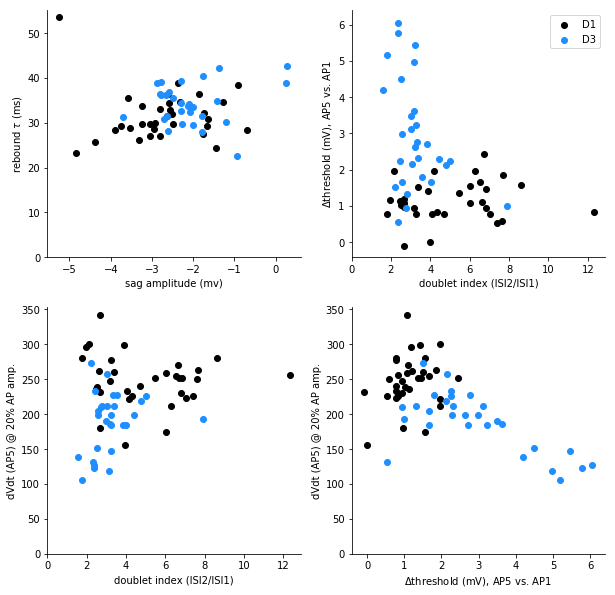

In [8]:
# Plot data for example cells
comparisons = [
        ('sag_fit_amplitude', 'reb_delta_t'), 
        ('doublet_index_by_num_spikes__5', 'delta_thresh_last_spike__5'),
        ('doublet_index_by_num_spikes__5', 'dVdt_pct_APamp_last_spike__20__rising__5'),
        ('delta_thresh_last_spike__5', 'dVdt_pct_APamp_last_spike__20__rising__5'), 
        ]

D1_D3_scatter_subplots(full_df, comparisons)

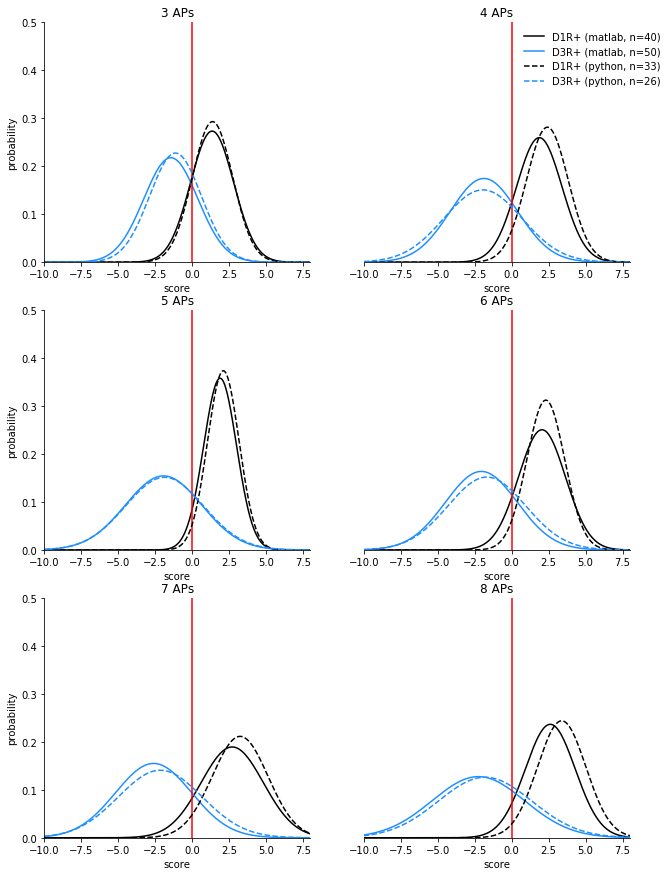

In [9]:
plot_classifier_comparison(full_df)